In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import os

In [39]:
for i in list(np.array(range(1,10))*10)+list(2**np.array(range(9))*100):
    print(i, int(i*(i-1)/2), 2400/25550*(i-50)+100)

10 45 96.2426614481409
20 190 97.18199608610567
30 435 98.12133072407045
40 780 99.06066536203522
50 1225 100.0
60 1770 100.93933463796478
70 2415 101.87866927592955
80 3160 102.81800391389433
90 4005 103.7573385518591
100 4950 104.69667318982387
200 19900 114.09001956947162
400 79800 132.87671232876713
800 319600 170.4500978473581
1600 1279200 245.5968688845401
3200 5118400 395.8904109589041
6400 20476800 696.4774951076321
12800 81913600 1297.651663405088
25600 327667200 2500.0


In [3]:
def summary_by_lambda(dir,lbd,alphas=None):

    if alphas != None:
        alphas.sort()
        alphas = list(set(alphas))

    if dir in ['outputs1','outputs2']:

        if dir == 'outputs1':
            graph_sizes = list(2**np.array(range(9))*10)
        else:
            graph_sizes = list(np.array(range(1,10))*10)+list(2**np.array(range(9))*100)

        with open(dir+'/mse1_'+str(lbd)+'.pkl', 'rb') as file:
            mse1 = pickle.load(file)
        with open(dir+'/mse2_'+str(lbd)+'.pkl', 'rb') as file:
            mse2 = pickle.load(file)
        if os.path.exists(dir+'/dur1_'+str(lbd)+'.pkl'):
            with open(dir+'/dur1_'+str(lbd)+'.pkl', 'rb') as file:
                dur1 = pickle.load(file)
            with open(dir+'/dur2_'+str(lbd)+'.pkl', 'rb') as file:
                dur2 = pickle.load(file)
            flag = True
        else:
            flag = False

        mse1 = np.array(mse1)
        T = mse1.shape[0]
        if -1 in mse1[:,1]:
            T_ = np.where(mse1[:,1] == -1)[0][0]
        else:
            T_ = T
        plt.plot(range(T),mse1[:,0], label = 'GNN, out_channels = floor(sqrt(n))', alpha = 0.75)
        plt.plot(range(T_),mse1[:T_,1], label = 'Bourgain', alpha = 0.75)
        plt.plot(range(T_),mse1[:T_,2], label = 'Sarma, k = 1', alpha = 0.75)
        plt.plot(range(T_),mse1[:T_,3], label = 'Sarma, k = 2', alpha = 0.75)
        plt.plot(range(T_),mse1[:T_,4], label = 'Sarma, k = 3', alpha = 0.75)
        custom_ticks = range(T)
        custom_labels = graph_sizes[0:T]
        plt.xticks(custom_ticks, custom_labels,rotation=45)
        plt.xlabel('Graph Size')
        plt.ylabel('MSE')
        plt.title('Mean All-Distance MSE: lambda = '+str(lbd))
        plt.legend()
        plt.savefig(dir+'/mse1_'+str(lbd)+'.png')
        plt.close('all')

        if flag:
            dur1 = np.array(dur1)
            T = dur1.shape[0]
            plt.plot(range(T),dur1[:,0], label = 'GNN, out_channels = floor(sqrt(n))', alpha = 0.75)
            plt.plot(range(T),dur1[:,1], label = 'Bourgain', alpha = 0.75)
            plt.plot(range(T),dur1[:,2], label = 'Sarma, k = 1', alpha = 0.75)
            plt.plot(range(T),dur1[:,3], label = 'Sarma, k = 2', alpha = 0.75)
            plt.plot(range(T),dur1[:,4], label = 'Sarma, k = 3', alpha = 0.75)
            custom_ticks = range(T)
            custom_labels = graph_sizes[0:T]
            plt.xticks(custom_ticks, custom_labels,rotation=45)
            plt.xlabel('Graph Size')
            plt.ylabel('Runtime (seconds)')
            plt.title('Mean Total Runtime: lambda = '+str(lbd))
            plt.legend()
            plt.savefig(dir+'/dur1_'+str(lbd)+'.png')
            plt.close('all')

        mse2 = np.array(mse2)
        T = mse2.shape[0]
        if -1 in mse2[:,1]:
            T_ = np.where(mse2[:,1] == -1)[0][0]
        else:
            T_ = T
        plt.plot(range(T),mse2[:,0], label = 'GNN, out_channels = 1', alpha = 0.75)
        plt.plot(range(T_),mse2[:T_,1], label = 'Bourgain', alpha = 0.75)
        plt.plot(range(T_),mse2[:T_,2], label = 'Sarma, k = 1', alpha = 0.75)
        plt.plot(range(T_),mse2[:T_,3], label = 'Sarma, k = 2', alpha = 0.75)
        plt.plot(range(T_),mse2[:T_,4], label = 'Sarma, k = 3', alpha = 0.75)
        custom_ticks = range(T)
        custom_labels = graph_sizes[0:T]
        plt.xticks(custom_ticks, custom_labels,rotation=45)
        plt.xlabel('Graph Size')
        plt.ylabel('MSE')
        plt.title('Mean All-Distance MSE: lambda = '+str(lbd))
        plt.legend()
        plt.savefig(dir+'/mse2_'+str(lbd)+'.png')
        plt.close('all')

        if flag:
            dur2 = np.array(dur2)
            T = dur2.shape[0]
            plt.plot(range(T),dur2[:,0], label = 'GNN, out_channels = 1', alpha = 0.75)
            plt.plot(range(T),dur2[:,1], label = 'Bourgain', alpha = 0.75)
            plt.plot(range(T),dur2[:,2], label = 'Sarma, k = 1', alpha = 0.75)
            plt.plot(range(T),dur2[:,3], label = 'Sarma, k = 2', alpha = 0.75)
            plt.plot(range(T),dur2[:,4], label = 'Sarma, k = 3', alpha = 0.75)
            custom_ticks = range(T)
            custom_labels = graph_sizes[0:T]
            plt.xticks(custom_ticks, custom_labels,rotation=45)
            plt.xlabel('Graph Size')
            plt.ylabel('Runtime (seconds)')
            plt.title('Mean Total Runtime: lambda = '+str(lbd))
            plt.legend()
            plt.savefig(dir+'/dur2_'+str(lbd)+'.png')
            plt.close('all')

        if dir == 'outputs2':
            for alpha in [1.5,1.75,2,2.25]:
                if os.path.exists(dir+'/mse_'+str(lbd)+'_'+str(alpha)+'.pkl'):
                    with open(dir+'/mse_'+str(lbd)+'_'+str(alpha)+'.pkl', 'rb') as file:
                        mse_alpha = pickle.load(file)
                    mse_alpha = np.array(mse_alpha)
                    T = mse_alpha.shape[0]
                    plt.plot(range(T),mse_alpha[:,1], label = 'GNN, out_channels = floor(sqrt(n))', alpha = 0.75)
                    plt.plot(range(T),mse_alpha[:,2], label = 'GNN, out_channels = 1', alpha = 0.75)
                    plt.plot(range(T),mse_alpha[:,3], label = 'Bourgain', alpha = 0.75)
                    plt.plot(range(T),mse_alpha[:,4], label = 'Sarma, k = 1', alpha = 0.75)
                    plt.plot(range(T),mse_alpha[:,5], label = 'Sarma, k = 2', alpha = 0.75)
                    plt.plot(range(T),mse_alpha[:,6], label = 'Sarma, k = 3', alpha = 0.75)
                    custom_ticks = range(T)
                    custom_labels = mse_alpha[:,0]
                    plt.xticks(custom_ticks, custom_labels,rotation=45)
                    plt.xlabel('Graph Size')
                    plt.ylabel('MSE')
                    plt.title('Mean Random-Distance MSE: lambda = '+str(lbd)+', alpha = '+str(alpha))
                    plt.legend()
                    plt.savefig(dir+'/mse_'+str(lbd)+'_'+str(alpha)+'.png')
                    plt.close('all')

    else:

        if os.path.exists(dir+'/dur_'+str(lbd)+'.pkl'):
            with open(dir+'/dur_'+str(lbd)+'.pkl', 'rb') as file:
                dur = pickle.load(file)
            dur = np.array(dur)
            T = dur.shape[0]
            plt.plot(range(T),dur[:,1], label = 'GNN, out_channels = floor(sqrt(n))', alpha = 0.75)
            plt.plot(range(T),dur[:,2], label = 'GNN, out_channels = 1', alpha = 0.75)
            plt.plot(range(T),dur[:,3], label = 'Bourgain', alpha = 0.75)
            plt.plot(range(T),dur[:,4], label = 'Sarma, k = 1', alpha = 0.75)
            plt.plot(range(T),dur[:,5], label = 'Sarma, k = 2', alpha = 0.75)
            plt.plot(range(T),dur[:,6], label = 'Sarma, k = 3', alpha = 0.75)
            custom_ticks = range(T)
            custom_labels = dur[:,0]
            plt.xticks(custom_ticks, custom_labels,rotation=45)
            plt.xlabel('Graph Size')
            plt.ylabel('Runtime (seconds)')
            plt.title('Mean Total Runtime: lambda = '+str(lbd))
            plt.legend()
            plt.savefig(dir+'/dur_'+str(lbd)+'.png')
            plt.close('all')

        if os.path.exists(dir+'/mse_'+str(lbd)+'.pkl'):
            with open(dir+'/mse_'+str(lbd)+'.pkl', 'rb') as file:
                mse = pickle.load(file)
            mse = np.array(mse)
            T = mse.shape[0]
            plt.plot(range(T),mse[:,1], label = 'GNN, out_channels = floor(sqrt(n))', alpha = 0.75)
            plt.plot(range(T),mse[:,2], label = 'GNN, out_channels = 1', alpha = 0.75)
            plt.plot(range(T),mse[:,3], label = 'Bourgain', alpha = 0.75)
            plt.plot(range(T),mse[:,4], label = 'Sarma, k = 1', alpha = 0.75)
            plt.plot(range(T),mse[:,5], label = 'Sarma, k = 2', alpha = 0.75)
            plt.plot(range(T),mse[:,6], label = 'Sarma, k = 3', alpha = 0.75)
            custom_ticks = range(T)
            custom_labels = mse[:,0]
            plt.xticks(custom_ticks, custom_labels,rotation=45)
            plt.xlabel('Graph Size')
            plt.ylabel('MSE')
            plt.title('Mean All-Distance MSE: lambda = '+str(lbd))
            plt.legend()
            plt.savefig(dir+'/mse_'+str(lbd)+'.png')
            plt.close('all')

        if alphas != None:
            for alpha in alphas:
                if os.path.exists(dir+'/mse_'+str(lbd)+'_'+str(alpha)+'.pkl'):
                    with open(dir+'/mse_'+str(lbd)+'_'+str(alpha)+'.pkl', 'rb') as file:
                        mse_alpha = pickle.load(file)
                    mse_alpha = np.array(mse_alpha)
                    T = mse_alpha.shape[0]
                    plt.plot(range(T),mse_alpha[:,1], label = 'GNN, out_channels = floor(sqrt(n))', alpha = 0.75)
                    plt.plot(range(T),mse_alpha[:,2], label = 'GNN, out_channels = 1', alpha = 0.75)
                    plt.plot(range(T),mse_alpha[:,3], label = 'Bourgain', alpha = 0.75)
                    plt.plot(range(T),mse_alpha[:,4], label = 'Sarma, k = 1', alpha = 0.75)
                    plt.plot(range(T),mse_alpha[:,5], label = 'Sarma, k = 2', alpha = 0.75)
                    plt.plot(range(T),mse_alpha[:,6], label = 'Sarma, k = 3', alpha = 0.75)
                    custom_ticks = range(T)
                    custom_labels = mse_alpha[:,0]
                    plt.xticks(custom_ticks, custom_labels,rotation=45)
                    plt.xlabel('Graph Size')
                    plt.ylabel('MSE')
                    plt.title('Mean Random-Distance MSE: lambda = '+str(lbd)+', alpha = '+str(alpha))
                    plt.legend()
                    plt.savefig(dir+'/mse_'+str(lbd)+'_'+str(alpha)+'.png')
                    plt.close('all')

def showFig_by_lambda(dir,lbds,alphas=None):

    lbds.sort()
    lbds = list(set(lbds))
    if alphas != None:
        alphas.sort()
        alphas = list(set(alphas))

    if dir == 'outputs1':
        #lbds = [1,2,4,8]
        for lbd in lbds:
            print('lambda = '+str(lbd))
            fig = plt.figure(figsize=(20, 10))
            img = mpimg.imread(dir+'/mse1_'+str(lbd)+'.png')
            fig.add_subplot(1, 2, 1)
            plt.imshow(img)
            plt.axis('off')
            img = mpimg.imread(dir+'/mse2_'+str(lbd)+'.png')
            fig.add_subplot(1, 2, 2)
            plt.imshow(img)
            plt.axis('off')
            plt.tight_layout()
            plt.show()

    elif dir == 'outputs2':

        #lbds = [2,4,6]
        alphas = [1.5,1.75,2,2.25]
        N = len(alphas)

        for lbd in lbds:

            print('lambda = '+str(lbd))
            fig = plt.figure(figsize=(40, 10))
            img = mpimg.imread(dir+'/mse1_'+str(lbd)+'.png')
            fig.add_subplot(1, 4, 1)
            plt.imshow(img)
            plt.axis('off')
            img = mpimg.imread(dir+'/dur1_'+str(lbd)+'.png')
            fig.add_subplot(1, 4, 2)
            plt.imshow(img)
            plt.axis('off')
            img = mpimg.imread(dir+'/mse2_'+str(lbd)+'.png')
            fig.add_subplot(1, 4, 3)
            plt.imshow(img)
            plt.axis('off')
            img = mpimg.imread(dir+'/dur2_'+str(lbd)+'.png')
            fig.add_subplot(1, 4, 4)
            plt.imshow(img)
            plt.axis('off')
            plt.tight_layout()
            plt.show()
            
            fig = plt.figure(figsize=(40, 10))
            for i in range(N):
                fig_path = dir+'/mse_'+str(lbd)+'_'+str(alphas[i])+'.png'
                if os.path.exists(fig_path):
                    img = mpimg.imread(fig_path)
                    fig.add_subplot(1, N, i+1)
                    plt.imshow(img)
                    plt.axis('off')
            plt.tight_layout()
            plt.show()

    else:

        for lbd in lbds:

            print('lambda = '+str(lbd))
            fig = plt.figure(figsize=(20, 10))
            if os.path.exists(dir+'/mse_'+str(lbd)+'.png'):
                img = mpimg.imread(dir+'/mse_'+str(lbd)+'.png')
                fig.add_subplot(1, 2, 1)
                plt.imshow(img)
                plt.axis('off')
            if os.path.exists(dir+'/dur_'+str(lbd)+'.png'):
                img = mpimg.imread(dir+'/dur_'+str(lbd)+'.png')
                fig.add_subplot(1, 2, 2)
                plt.imshow(img)
                plt.axis('off')
                plt.tight_layout()
                plt.show()

            if alphas != None:
                N = len(alphas)
                fig = plt.figure(figsize=(N*10, 10))
                for i in range(N):
                    if os.path.exists(dir+'/mse_'+str(lbd)+'_'+str(alphas[i])+'.png'):
                        img = mpimg.imread(dir+'/mse_'+str(lbd)+'_'+str(alphas[i])+'.png')
                        fig.add_subplot(1, N, i+1)
                        plt.imshow(img)
                        plt.axis('off')
                plt.tight_layout()
                plt.show()

lambda = 8


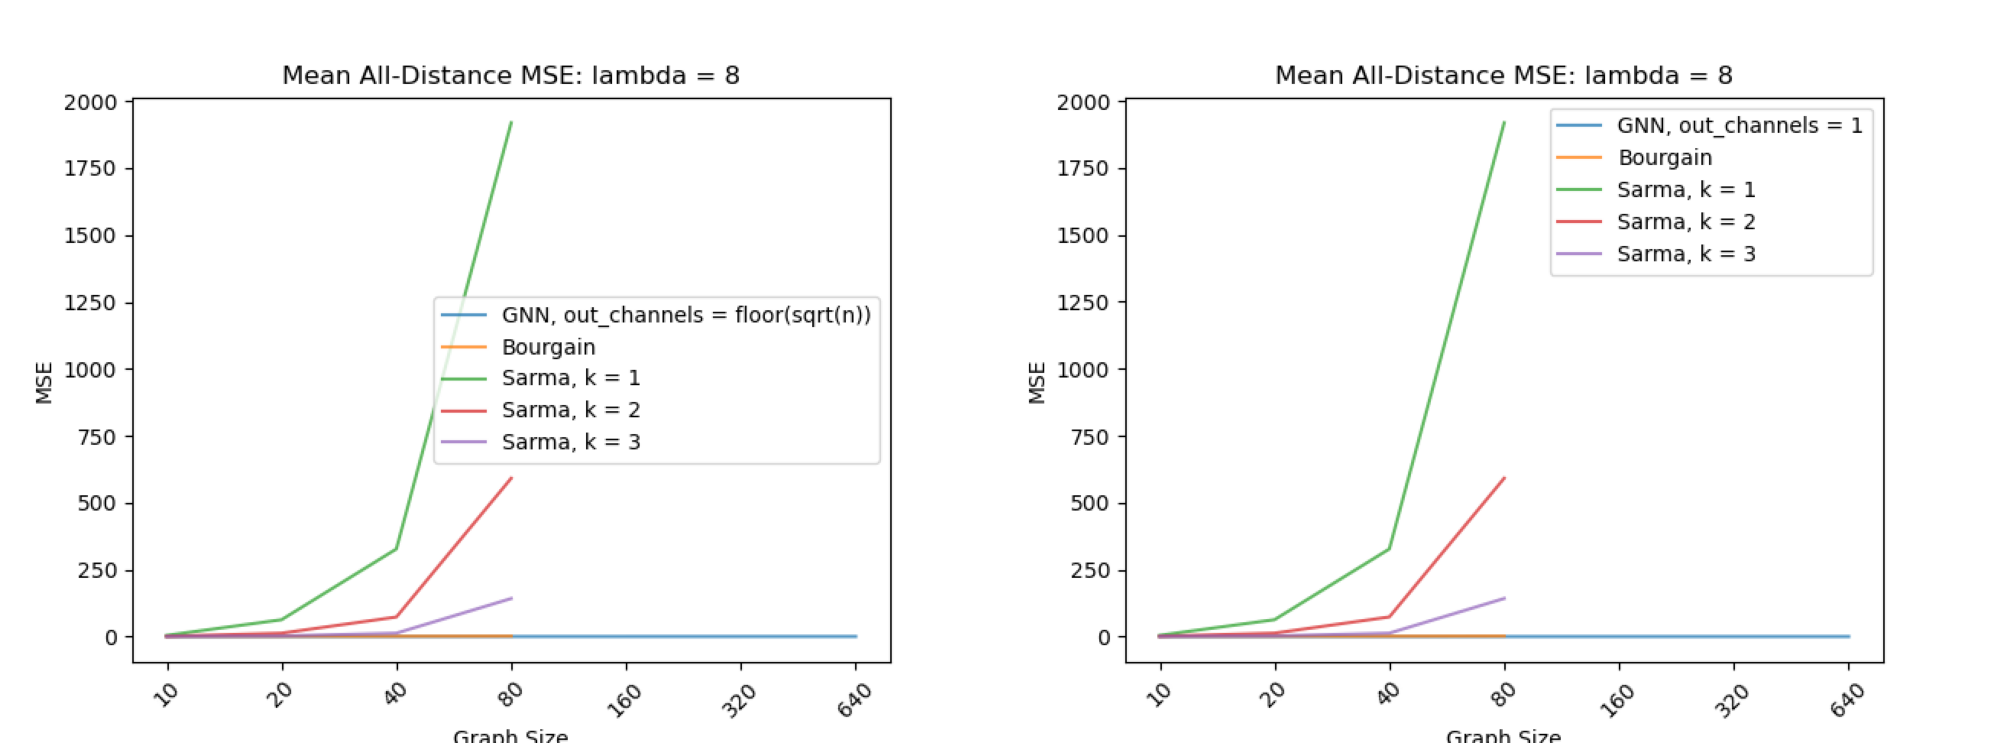

lambda = 1


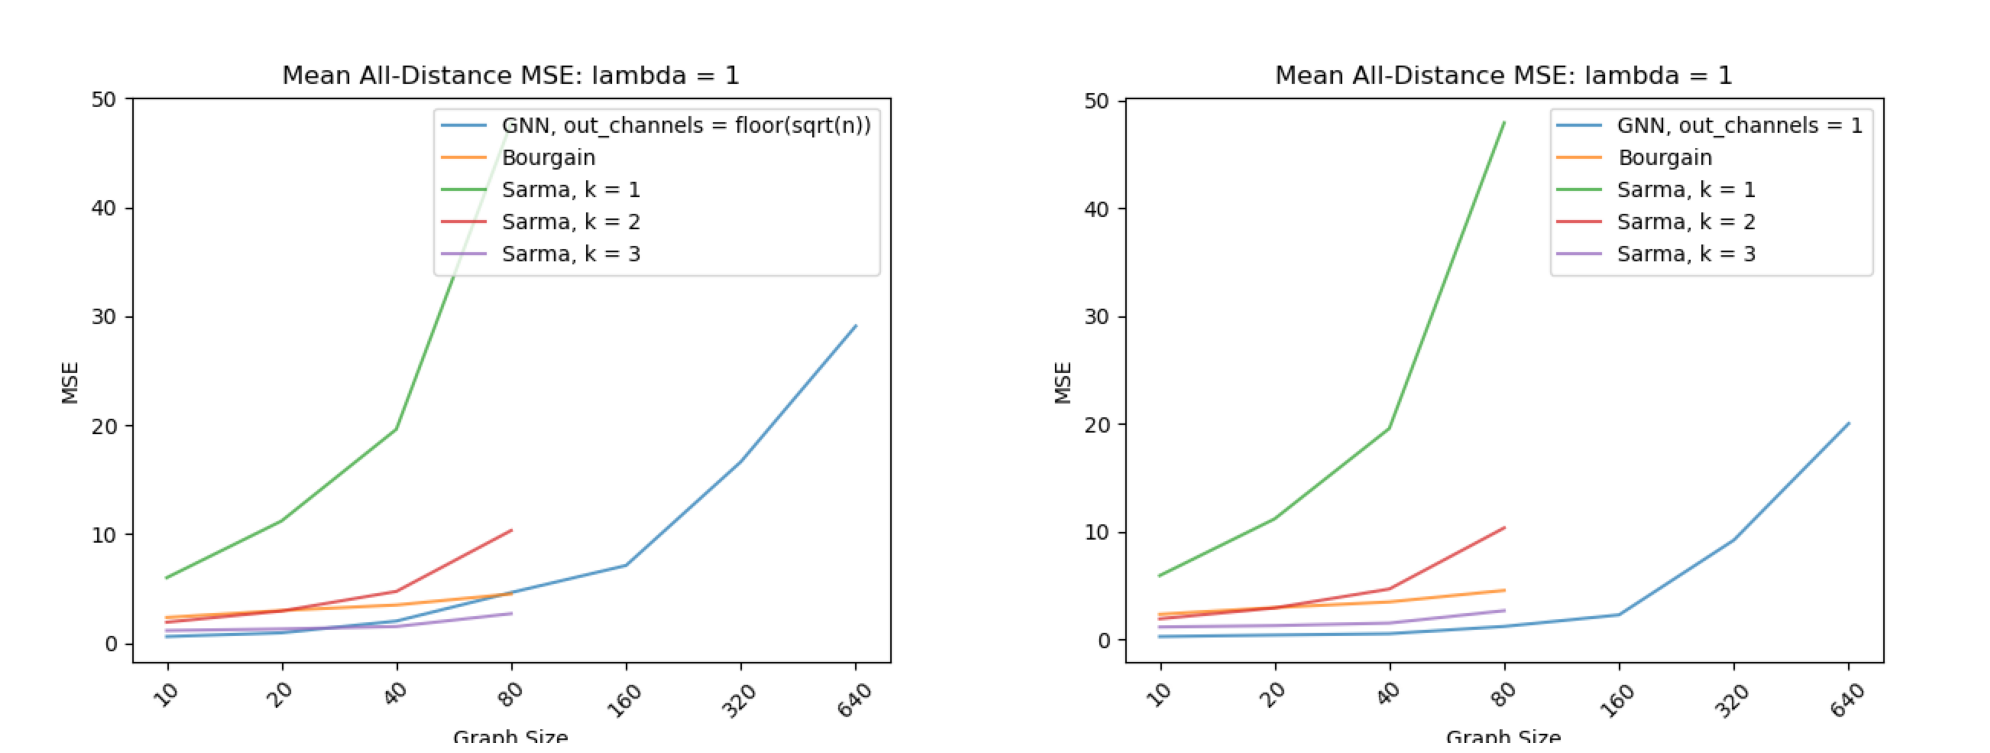

lambda = 2


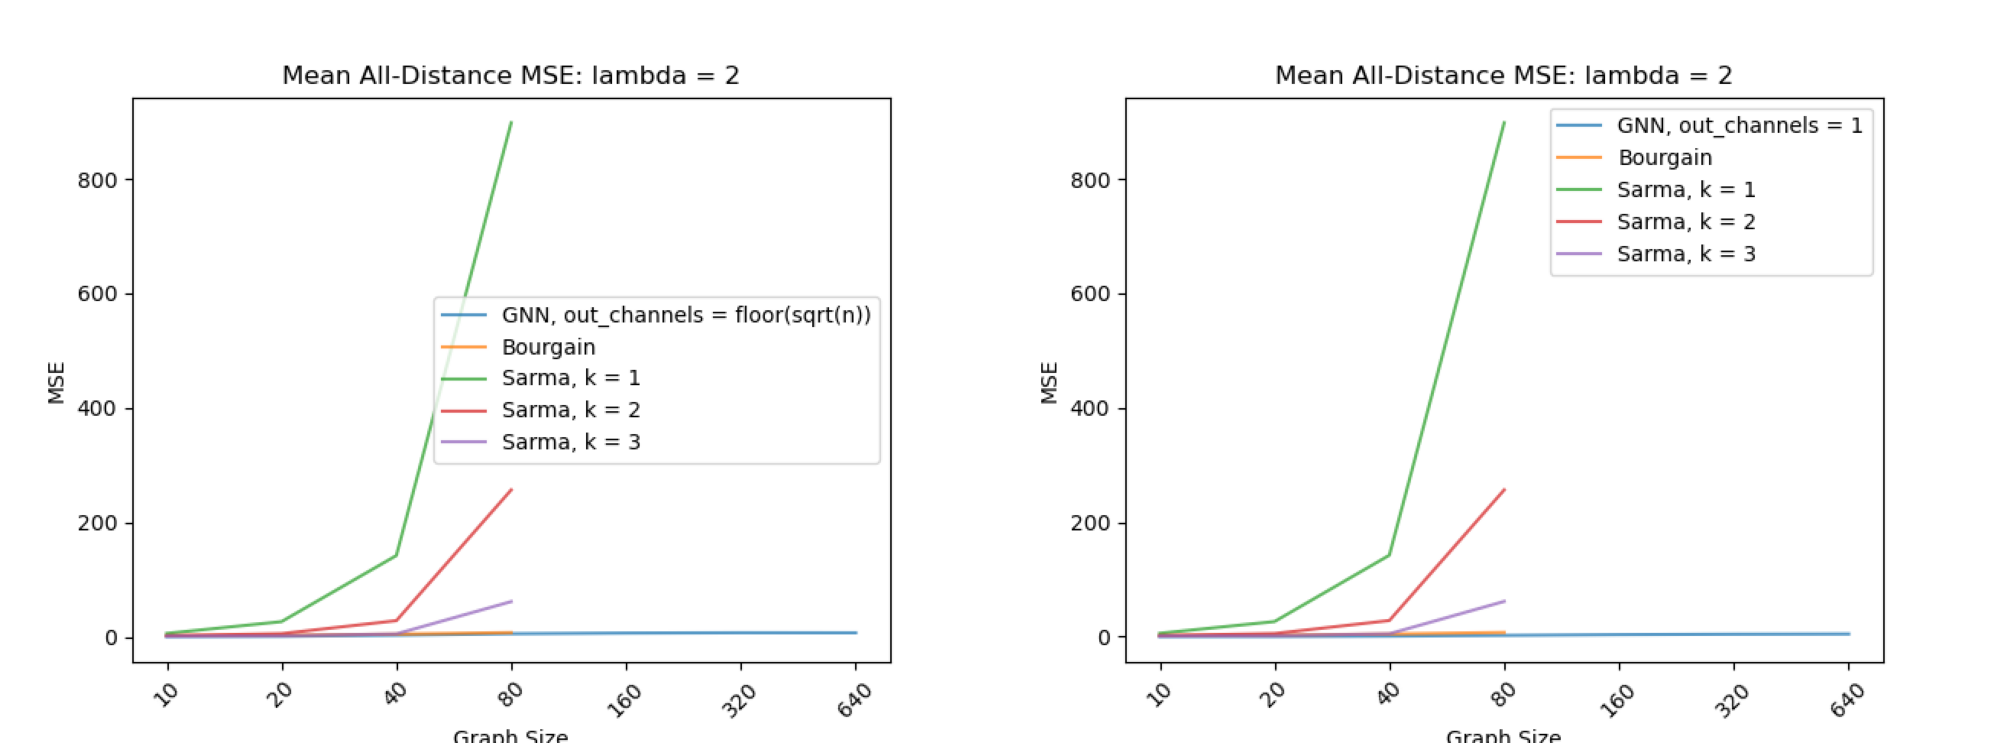

lambda = 4


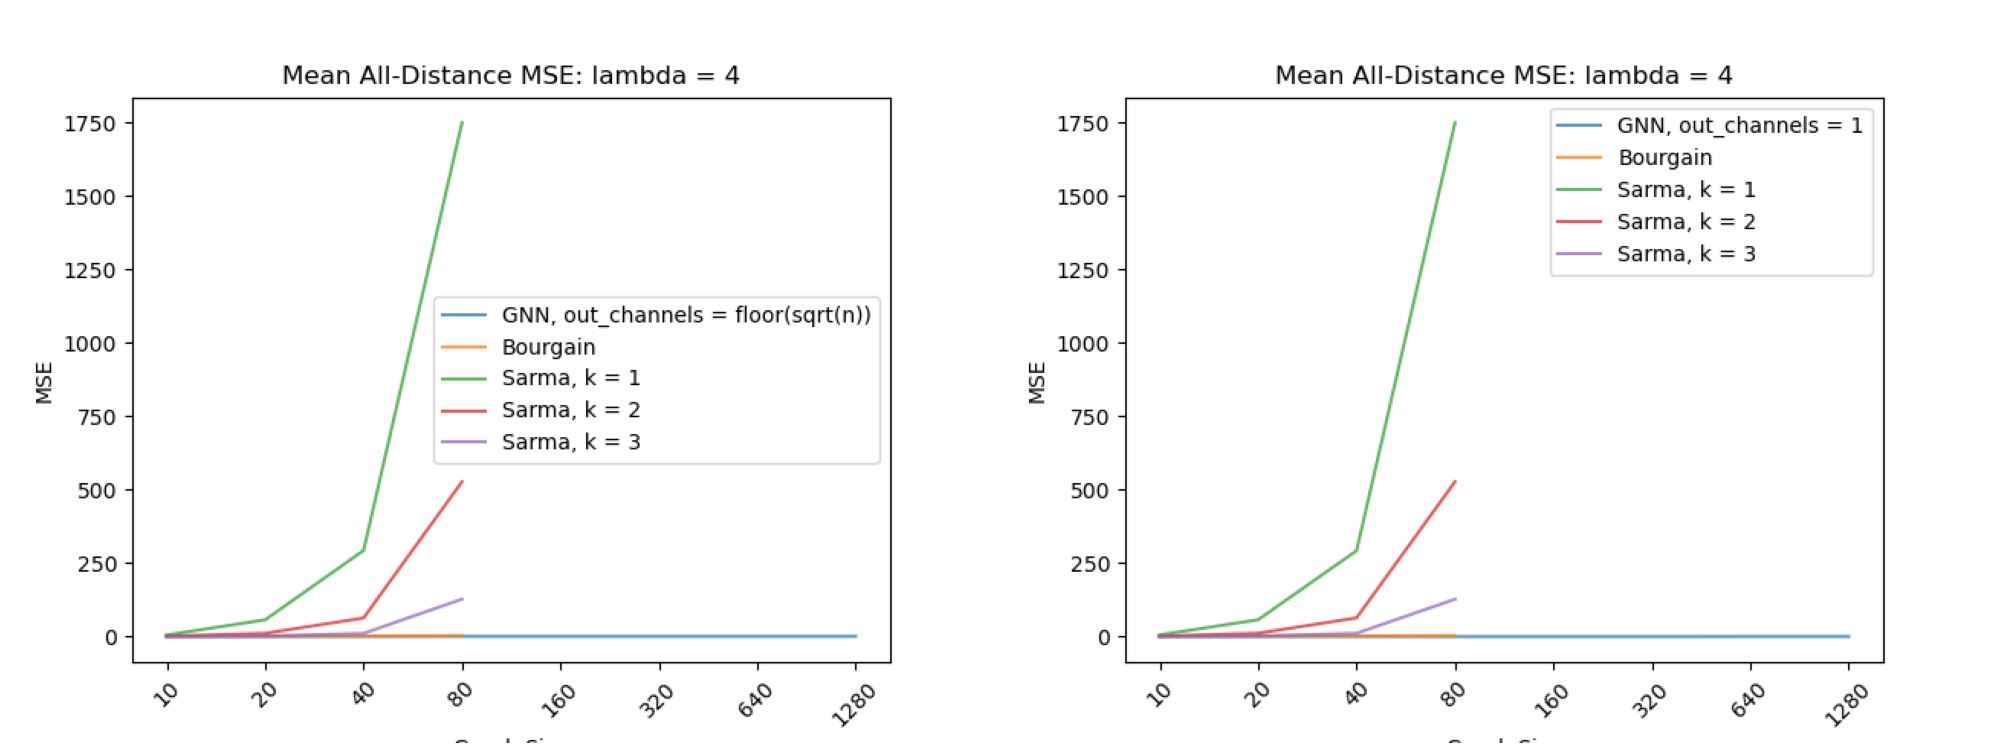

In [4]:
dir = 'outputs1'
lbds = [1,2,4,8]
for lbd in lbds:
    summary_by_lambda(dir,lbd)
showFig_by_lambda(dir,lbds)

lambda = 2


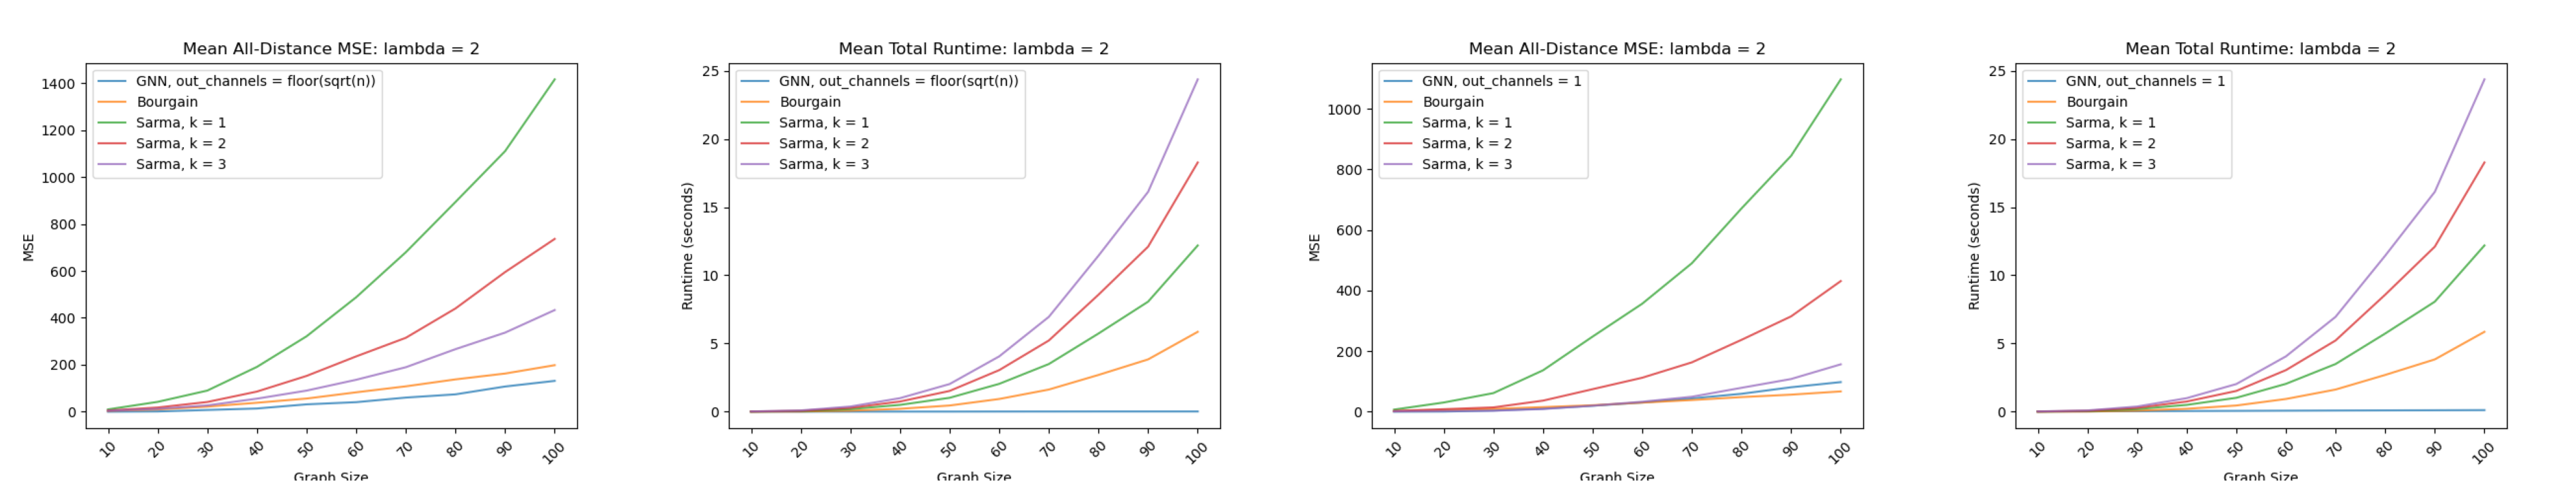

<Figure size 4000x1000 with 0 Axes>

lambda = 4


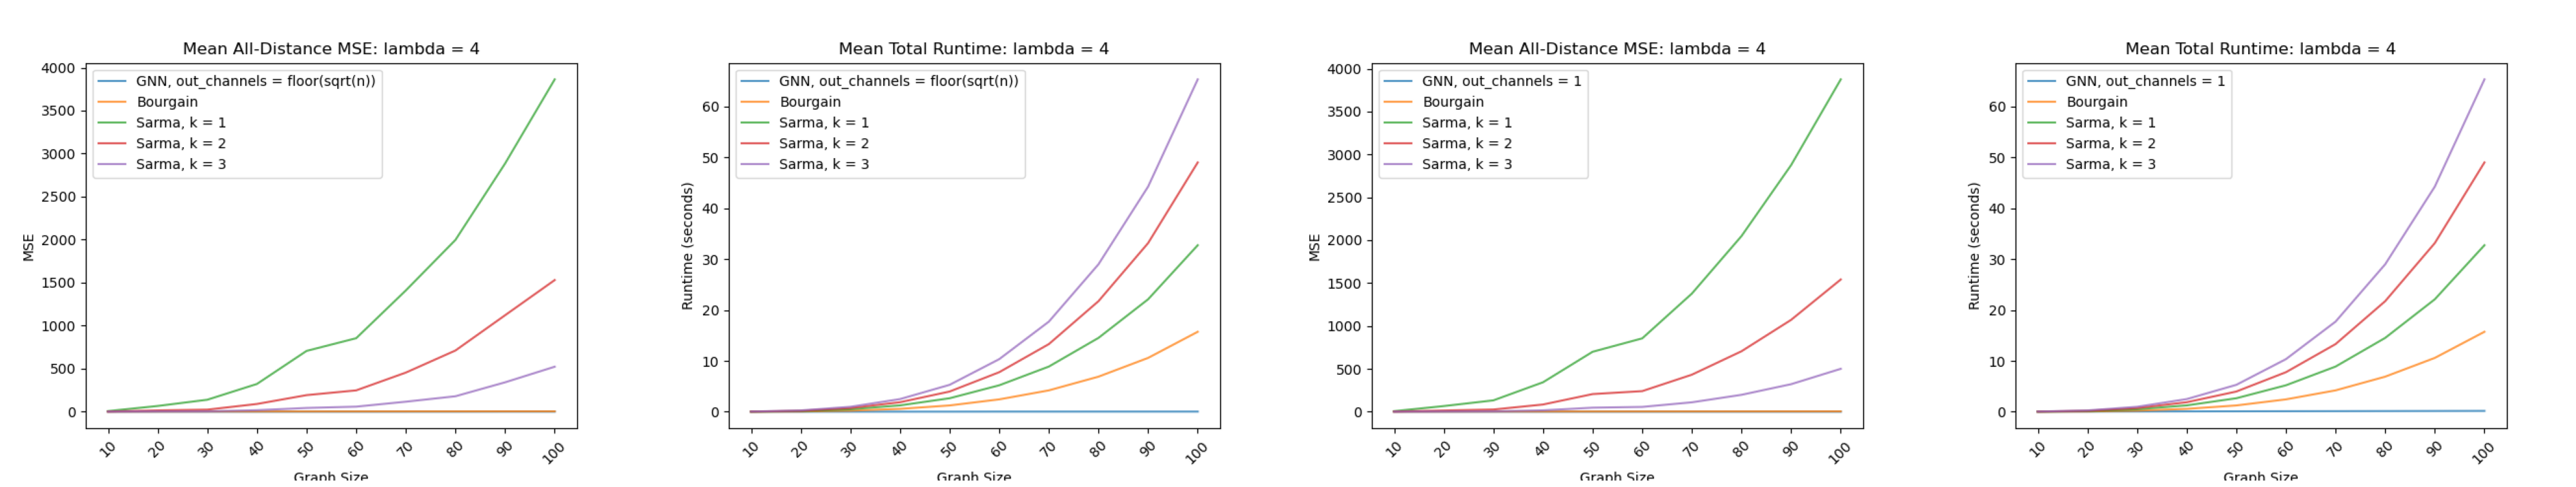

<Figure size 4000x1000 with 0 Axes>

lambda = 6


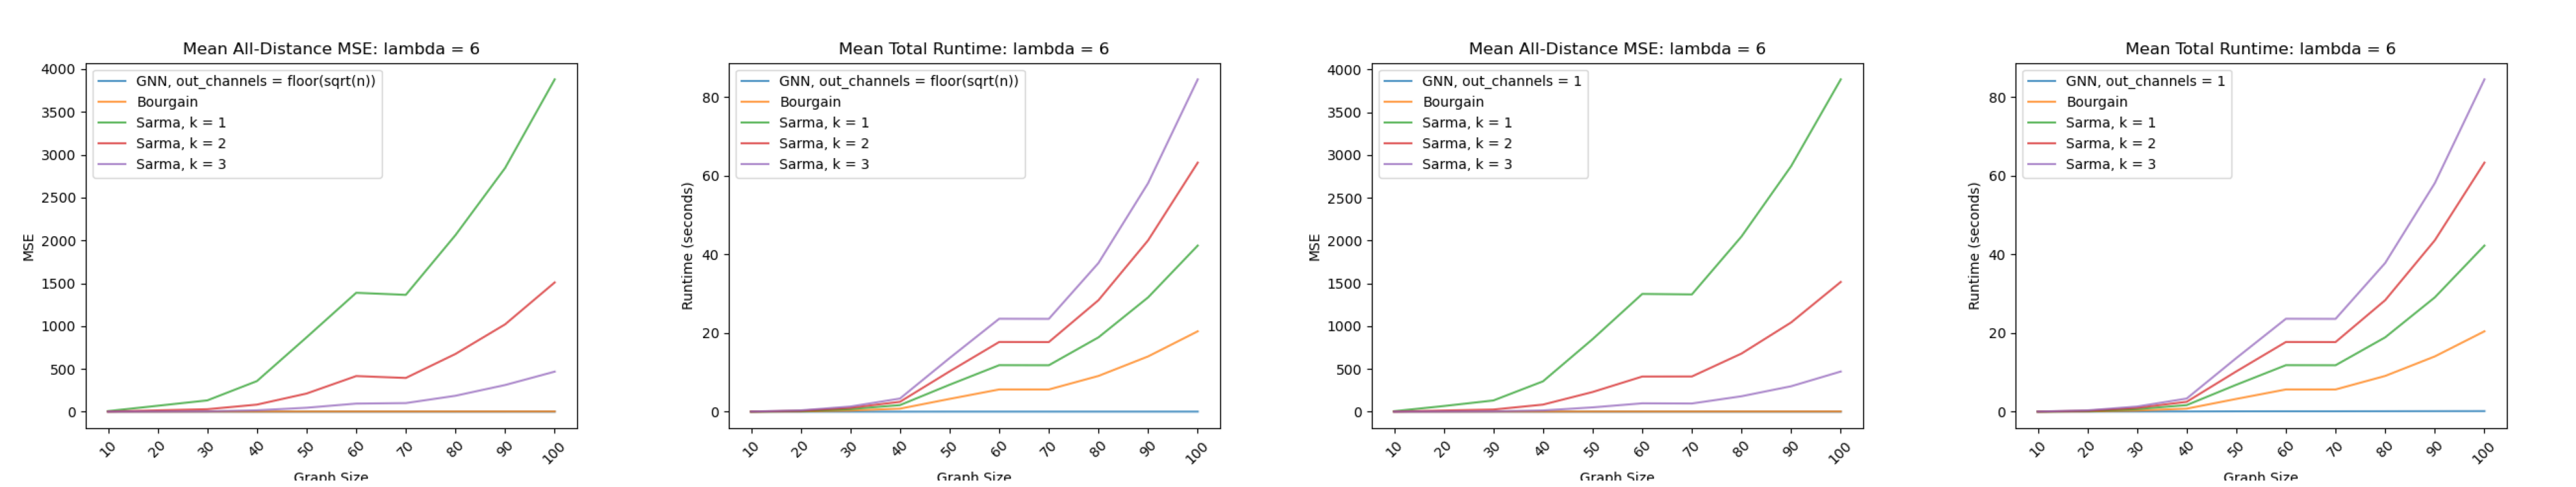

<Figure size 4000x1000 with 0 Axes>

In [5]:
dir = 'outputs2'
lbds = [2,4,6]
alphas = [1.5,1.75,2,2.25]
for lbd in lbds:
    summary_by_lambda(dir,lbd)
showFig_by_lambda(dir,lbds)

In [6]:
def summary_by_type(dir,lbds,alphas=None):

    lbds.sort()
    lbds = list(set(lbds))
    if alphas != None:
        alphas.sort()
        alphas = list(set(alphas))

    labels = ['GNN, out_channels = floor(sqrt(n))','GNN, out_channels = 1','Bourgain','Sarma, k = 1','Sarma, k = 2','Sarma, k = 3']

    if dir in ['outputs1','outputs2']:
  
        for data_index in range(5):

            if data_index == 0:
                label1 = labels[0]
                label2 = labels[1]
            if data_index == 1:
                label1 = labels[2]
                label2 = labels[2]
            if data_index == 2:
                label1 = labels[3]
                label2 = labels[3]
            if data_index == 3:
                label1 = labels[4]
                label2 = labels[4]
            if data_index == 4:
                label1 = labels[5]
                label2 = labels[5]

            if dir == 'outputs2':

                graph_sizes = list(np.array(range(1,10))*10)+list(2**np.array(range(9))*100)
                #lbds = [2,4,6]
                alphas = [1.5,1.75,2,2.25]

                fig = plt.figure(figsize=(30, 5))

                fig.add_subplot(1, 4, 1)
                for lbd in lbds:
                    with open(dir+'/mse1_'+str(lbd)+'.pkl', 'rb') as file:
                        mse1 = pickle.load(file)
                    mse1 = np.array(mse1)
                    T = mse1.shape[0]
                    if -1 in mse1[:,1]:
                        T_ = np.where(mse1[:,1] == -1)[0][0]
                    else:
                        T_ = T
                    if data_index == 0:
                        plt.plot(range(T),mse1[:T,0],label = 'lambda = '+str(lbd))
                    else:
                        plt.plot(range(T_),mse1[:T_,data_index],label = 'lambda = '+str(lbd))
                custom_ticks = range(T)
                custom_labels = graph_sizes[0:T]
                plt.xticks(custom_ticks, custom_labels,rotation=45)
                plt.xlabel('Graph Size')
                plt.ylabel('MSE')
                plt.title('Mean All-Distance MSE: '+label1)
                plt.legend()

                fig.add_subplot(1, 4, 2)
                for lbd in lbds:
                    with open(dir+'/dur1_'+str(lbd)+'.pkl', 'rb') as file:
                        dur1 = pickle.load(file)
                    dur1 = np.array(dur1)
                    T = dur1.shape[0]
                    if -1 in dur1[:,1]:
                        T_ = np.where(dur1[:,1] == -1)[0][0]
                    else:
                        T_ = T
                    if data_index == 0:
                        plt.plot(range(T),dur1[:T,0],label = 'lambda = '+str(lbd))
                    else:
                        plt.plot(range(T_),dur1[:T_,data_index],label = 'lambda = '+str(lbd))
                custom_ticks = range(T)
                custom_labels = graph_sizes[0:T]
                plt.xticks(custom_ticks, custom_labels,rotation=45)
                plt.xlabel('Graph Size')
                plt.ylabel('Runtime (seconds)')
                plt.title('Mean Total Runtime: '+label1)
                plt.legend()
            
                fig.add_subplot(1, 4, 3)
                for lbd in lbds:
                    with open(dir+'/mse2_'+str(lbd)+'.pkl', 'rb') as file:
                        mse2 = pickle.load(file)
                    mse2 = np.array(mse2)
                    T = mse2.shape[0]
                    if -1 in mse2[:,1]:
                        T_ = np.where(mse2[:,1] == -1)[0][0]
                    else:
                        T_ = T
                    if data_index == 0:
                        plt.plot(range(T),mse2[:T,0],label = 'lambda = '+str(lbd))
                    else:
                        plt.plot(range(T_),mse2[:T_,data_index],label = 'lambda = '+str(lbd))
                custom_ticks = range(T)
                custom_labels = graph_sizes[0:T]
                plt.xticks(custom_ticks, custom_labels,rotation=45)
                plt.xlabel('Graph Size')
                plt.ylabel('MSE')
                plt.title('Mean All-Distance MSE: '+label2)
                plt.legend()

                fig.add_subplot(1, 4, 4)
                for lbd in lbds:
                    with open(dir+'/dur2_'+str(lbd)+'.pkl', 'rb') as file:
                        dur2 = pickle.load(file)
                    dur2 = np.array(dur2)
                    T = dur2.shape[0]
                    if -1 in dur2[:,1]:
                        T_ = np.where(dur2[:,1] == -1)[0][0]
                    else:
                        T_ = T
                    if data_index == 0:
                        plt.plot(range(T),dur2[:T,0],label = 'lambda = '+str(lbd))
                    else:
                        plt.plot(range(T_),dur2[:T_,data_index],label = 'lambda = '+str(lbd))
                custom_ticks = range(T)
                custom_labels = graph_sizes[0:T]
                plt.xticks(custom_ticks, custom_labels,rotation=45)
                plt.xlabel('Graph Size')
                plt.ylabel('Runtime (seconds)')
                plt.title('Mean Total Runtime: '+label1)
                plt.legend()
                
                plt.show()  

                N = len(alphas)
                fig = plt.figure(figsize=(N*7.5, 5))
                for i in range(N):
                    fig.add_subplot(1, N, i+1)
                    for lbd in lbds:
                        if os.path.exists(dir+'/mse_'+str(lbd)+'_'+str(alphas[i])+'.pkl'):
                            with open(dir+'/mse_'+str(lbd)+'_'+str(alphas[i])+'.pkl', 'rb') as file:
                                mse = pickle.load(file)
                            mse = np.array(mse)
                            T = mse.shape[0]
                            if -1 in mse[:,1]:
                                T_ = np.where(mse[:,2] == -1)[0][0]
                            else:
                                T_ = T
                            if data_index in [0,1]:
                                plt.plot(range(T),mse[:T,data_index+1],label = 'lambda = '+str(lbd))
                            else:
                                plt.plot(range(T_),mse[:T_,data_index+1],label = 'lambda = '+str(lbd))
                    custom_ticks = range(T)
                    custom_labels = graph_sizes[0:T]
                    plt.xticks(custom_ticks, custom_labels,rotation=45)
                    plt.xlabel('Graph Size')
                    plt.ylabel('MSE')
                    plt.title('Mean Random-Distance MSE: '+labels[data_index]+', alpha = '+str(alphas[i]))
                    plt.legend()
                plt.show()

            else:

                graph_sizes = list(2**np.array(range(9))*10)
                #lbds = [1,2,4,8]

                fig = plt.figure(figsize=(15, 5))

                fig.add_subplot(1, 2, 1)
                for lbd in lbds:
                    with open(dir+'/mse1_'+str(lbd)+'.pkl', 'rb') as file:
                        mse1 = pickle.load(file)
                    mse1 = np.array(mse1)
                    T = mse1.shape[0]
                    if -1 in mse1[:,1]:
                        T_ = np.where(mse1[:,1] == -1)[0][0]
                    else:
                        T_ = T
                    if data_index == 0:
                        plt.plot(range(T),mse1[:T,0],label = 'lambda = '+str(lbd))
                    else:
                        plt.plot(range(T_),mse1[:T_,data_index],label = 'lambda = '+str(lbd))
                custom_ticks = range(T)
                custom_labels = graph_sizes[0:T]
                plt.xticks(custom_ticks, custom_labels,rotation=45)
                plt.xlabel('Graph Size')
                plt.ylabel('MSE')
                plt.title('Mean All-Distance MSE: '+label1)
                plt.legend()
                
                fig.add_subplot(1, 2, 2)
                for lbd in lbds:
                    with open(dir+'/mse2_'+str(lbd)+'.pkl', 'rb') as file:
                        mse2 = pickle.load(file)
                    mse2 = np.array(mse2)
                    T = mse2.shape[0]
                    if -1 in mse2[:,1]:
                        T_ = np.where(mse2[:,1] == -1)[0][0]
                    else:
                        T_ = T
                    if data_index == 0:
                        plt.plot(range(T),mse2[:T,0],label = 'lambda = '+str(lbd))
                    else:
                        plt.plot(range(T_),mse2[:T_,data_index],label = 'lambda = '+str(lbd))
                custom_ticks = range(T)
                custom_labels = graph_sizes[0:T]
                plt.xticks(custom_ticks, custom_labels,rotation=45)
                plt.xlabel('Graph Size')
                plt.ylabel('MSE')
                plt.title('Mean All-Distance MSE: '+label2)
                plt.legend()
                
                plt.show()

    else:
      
        for data_index in range(6):

            fig = plt.figure(figsize=(15, 5))

            fig.add_subplot(1, 2, 1)
            for lbd in lbds:
                if os.path.exists(dir+'/mse_'+str(lbd)+'.pkl'):
                    with open(dir+'/mse_'+str(lbd)+'.pkl', 'rb') as file:
                        mse = pickle.load(file)
                    mse = np.array(mse)
                    T = mse.shape[0]
                    if -1 in mse[:,1]:
                        T_ = np.where(mse[:,2] == -1)[0][0]
                    else:
                        T_ = T
                    if data_index in [0,1]:
                        plt.plot(range(T),mse[:T,data_index+1],label = 'lambda = '+str(lbd))
                    else:
                        plt.plot(range(T_),mse[:T_,data_index+1],label = 'lambda = '+str(lbd))
            custom_ticks = range(T)
            custom_labels = graph_sizes[0:T]
            plt.xticks(custom_ticks, custom_labels,rotation=45)
            plt.xlabel('Graph Size')
            plt.ylabel('MSE')
            plt.title('Mean All-Distance MSE: '+labels[data_index])
            plt.legend()

            fig.add_subplot(1, 2, 2)
            for lbd in lbds:
                if os.path.exists(dir+'/dur_'+str(lbd)+'.pkl'):
                    with open(dir+'/dur_'+str(lbd)+'.pkl', 'rb') as file:
                        dur = pickle.load(file)
                    dur = np.array(dur)
                    T = dur.shape[0]
                    if -1 in dur[:,1]:
                        T_ = np.where(dur[:,2] == -1)[0][0]
                    else:
                        T_ = T
                    if data_index in [0,1]:
                        plt.plot(range(T),dur[:T,data_index+1],label = 'lambda = '+str(lbd))
                    else:
                        plt.plot(range(T_),dur[:T_,data_index+1],label = 'lambda = '+str(lbd))
            custom_ticks = range(T)
            custom_labels = graph_sizes[0:T]
            plt.xticks(custom_ticks, custom_labels,rotation=45)
            plt.xlabel('Graph Size')
            plt.ylabel('Runtime (seconds)')
            plt.title('Mean Total Runtime MSE: '+labels[data_index])
            plt.legend()

            plt.show() 

            if alphas != None:
                N = len(alphas)
                fig = plt.figure(figsize=(N*7.5, 5))
                for i in range(N):
                    fig.add_subplot(1, N, i+1)
                    for lbd in lbds:
                        if os.path.exists(dir+'/mse_'+str(lbd)+'_'+str(alphas[i])+'.pkl'):
                            with open(dir+'/mse_'+str(lbd)+'_'+str(alphas[i])+'.pkl', 'rb') as file:
                                mse = pickle.load(file)
                            mse = np.array(mse)
                            T = mse.shape[0]
                            if -1 in mse[:,1]:
                                T_ = np.where(mse[:,2] == -1)[0][0]
                            else:
                                T_ = T
                            if data_index in [0,1]:
                                plt.plot(range(T),mse[:T,data_index+1],label = 'lambda = '+str(lbd))
                            else:
                                plt.plot(range(T_),mse[:T_,data_index+1],label = 'lambda = '+str(lbd))
                    custom_ticks = range(T)
                    custom_labels = graph_sizes[0:T]
                    plt.xticks(custom_ticks, custom_labels,rotation=45)
                    plt.xlabel('Graph Size')
                    plt.ylabel('MSE')
                    plt.title('Mean Random-Distance MSE: '+labels[data_index]+', alpha = '+str(alphas[i]))
                    plt.legend()
                plt.show()

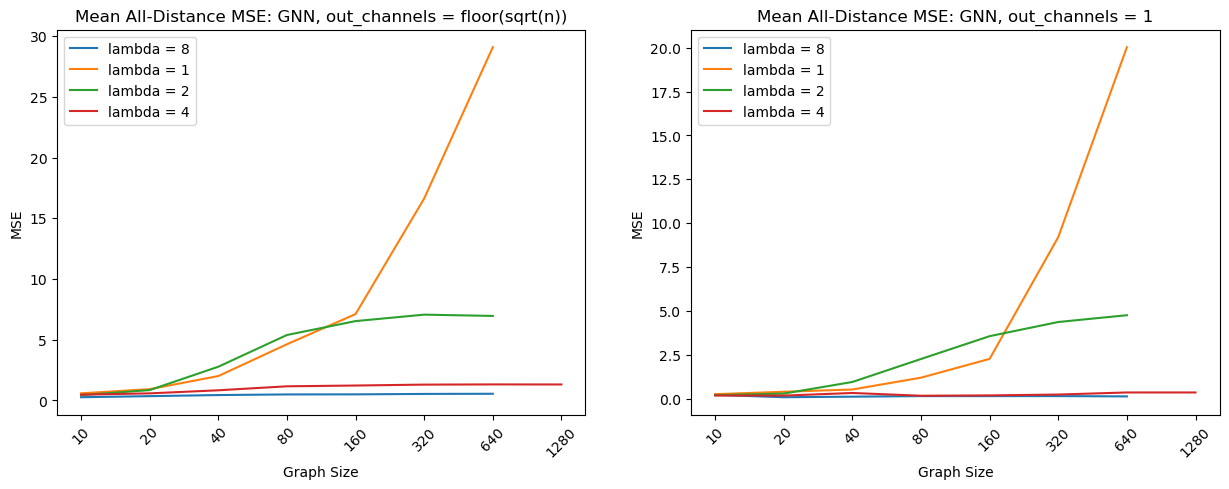

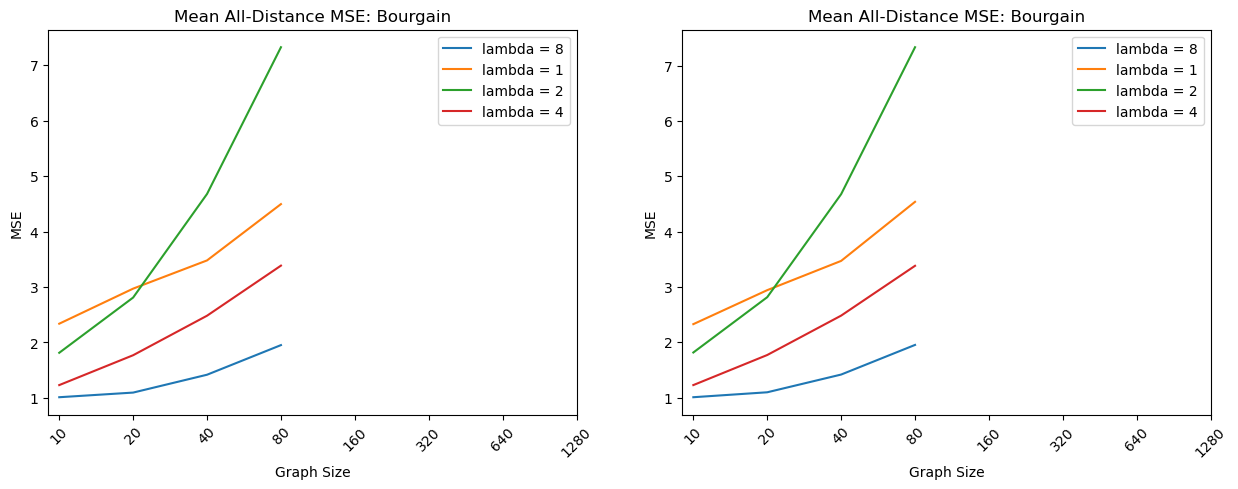

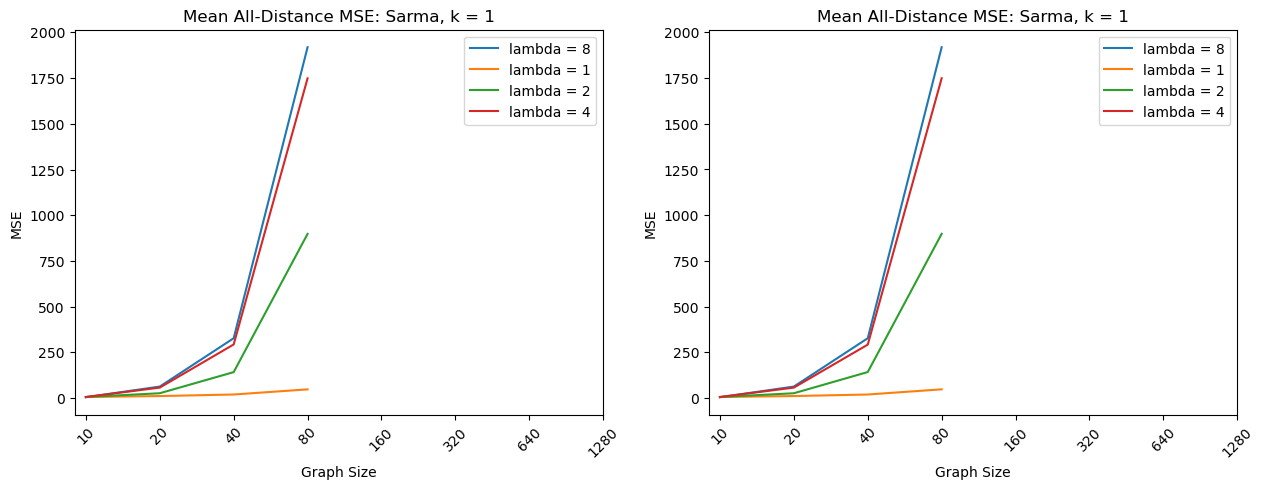

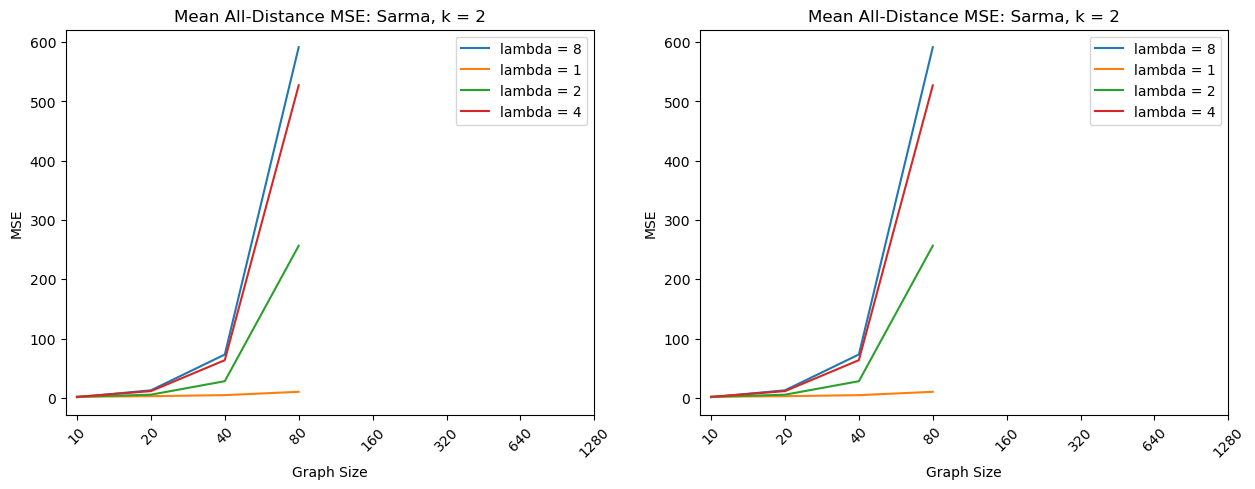

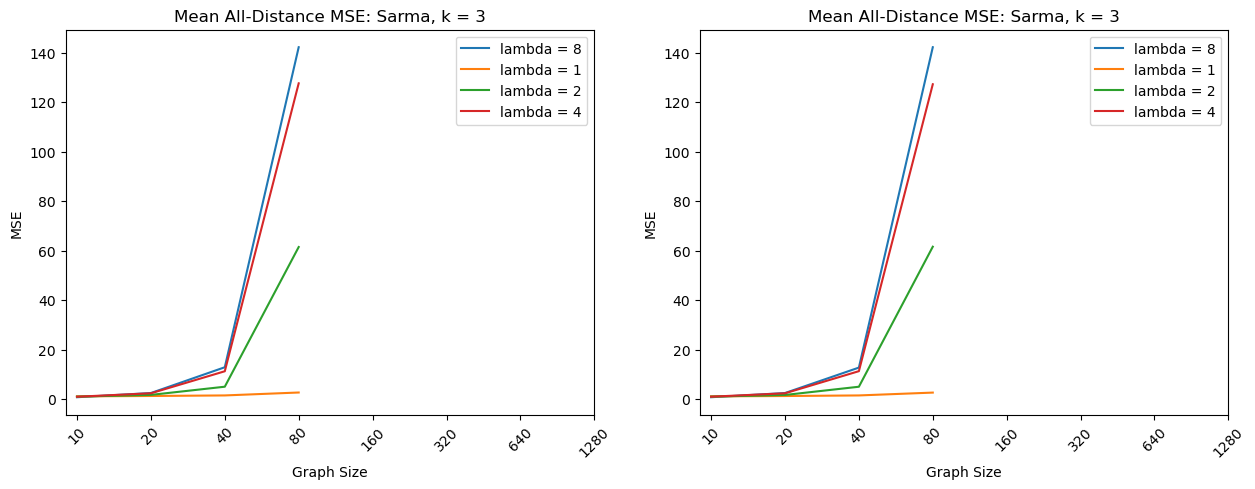

In [7]:
dir = 'outputs1'
lbds = [1,2,4,8]
summary_by_type(dir,lbds)

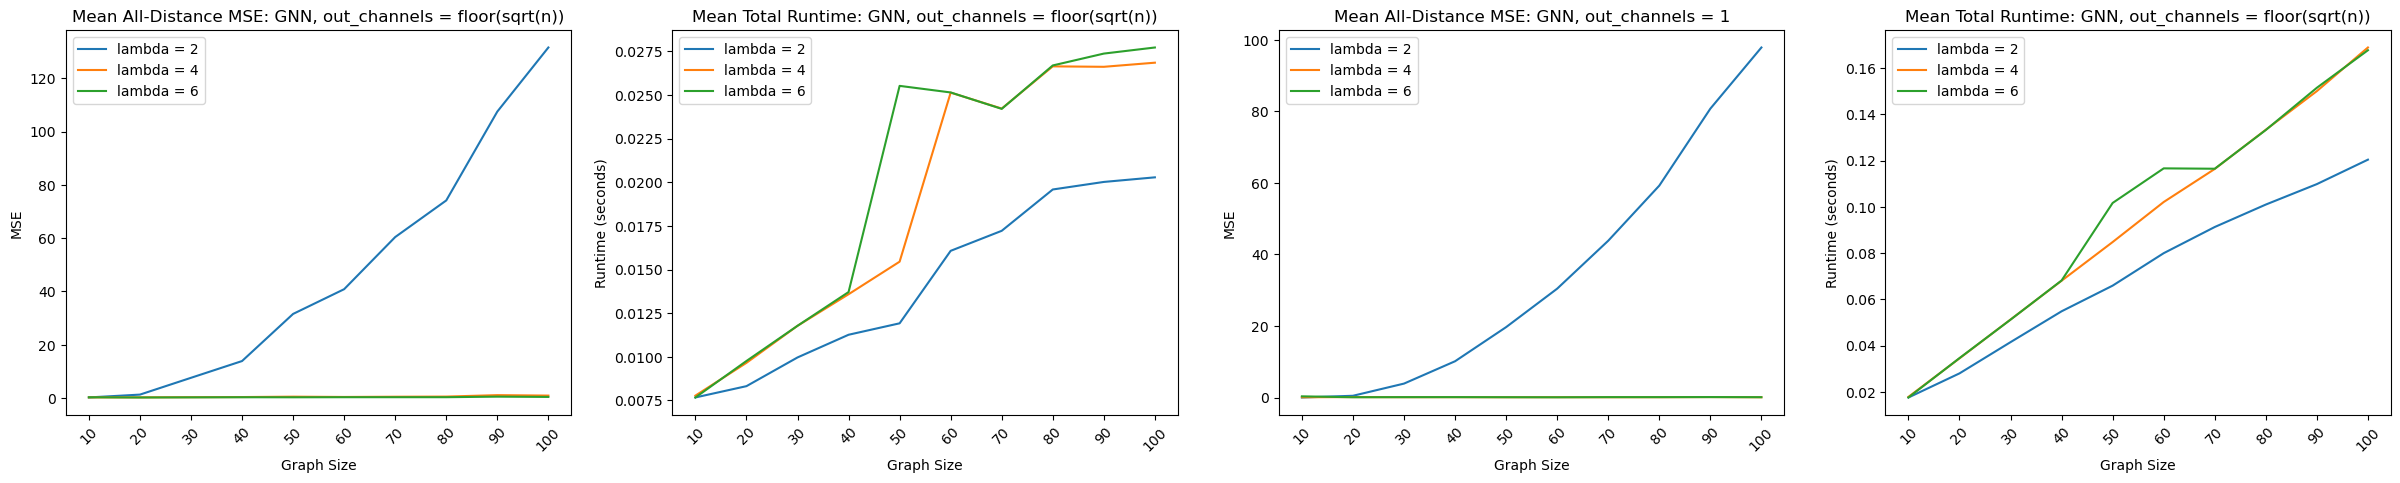

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


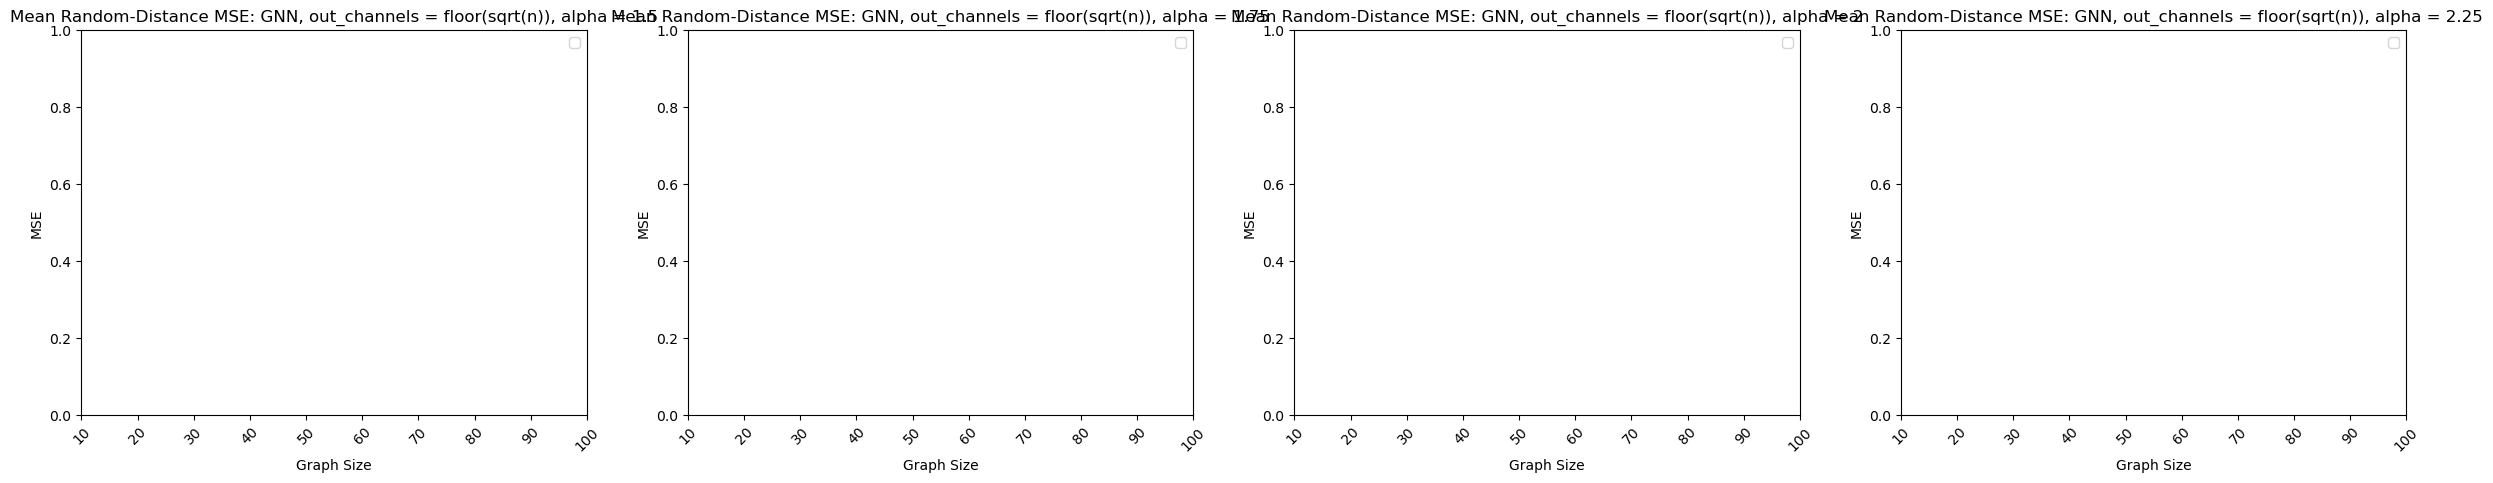

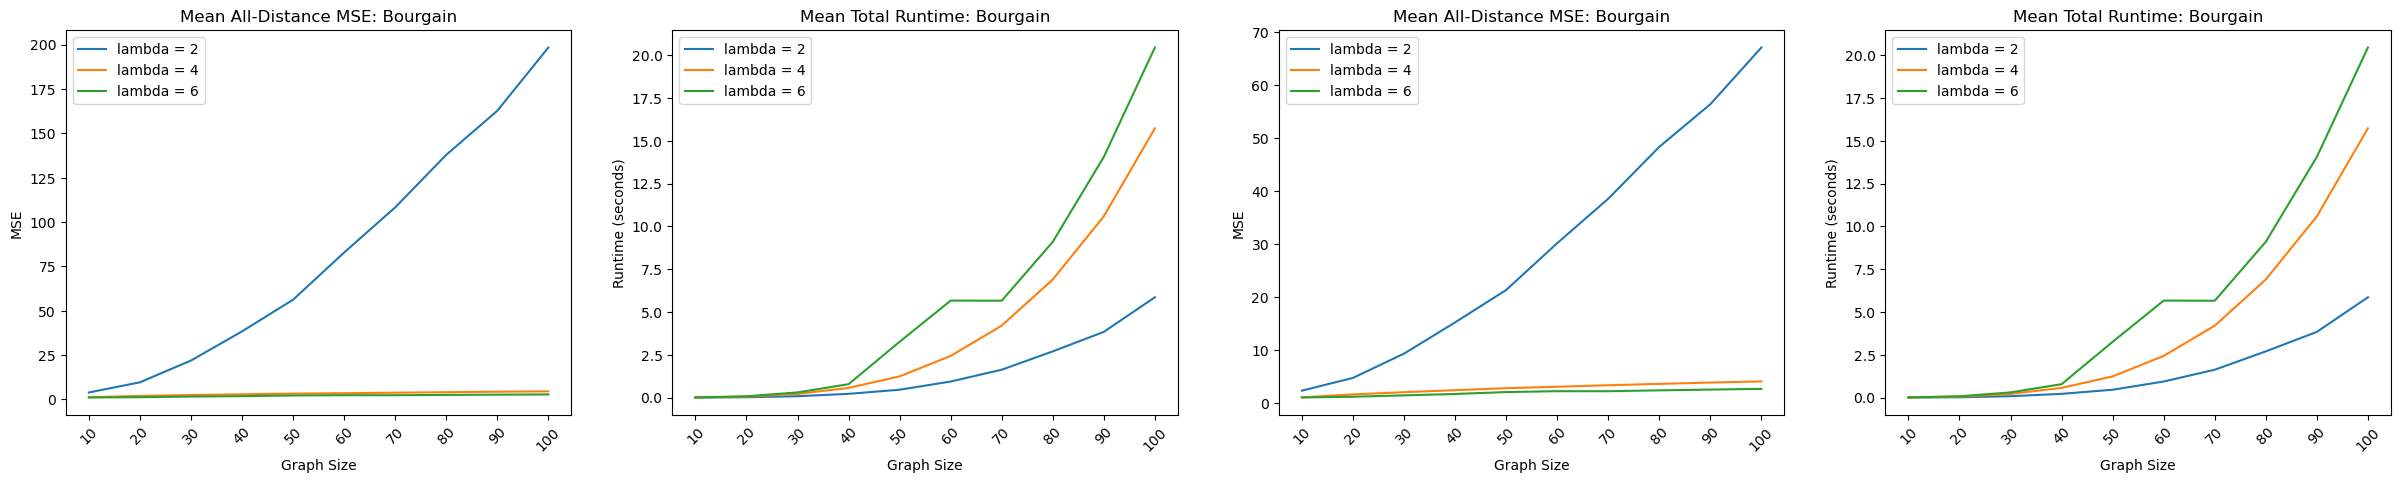

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


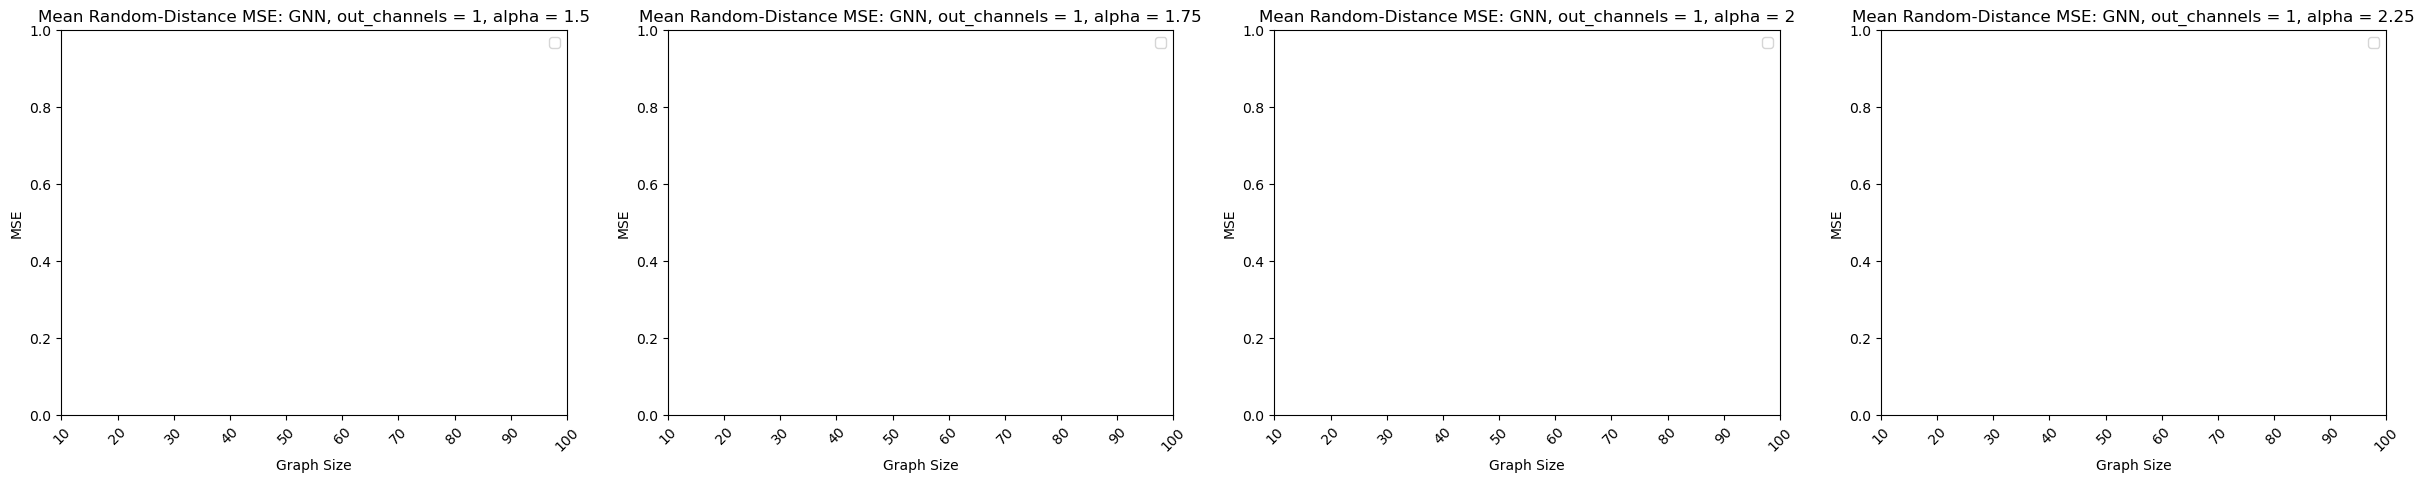

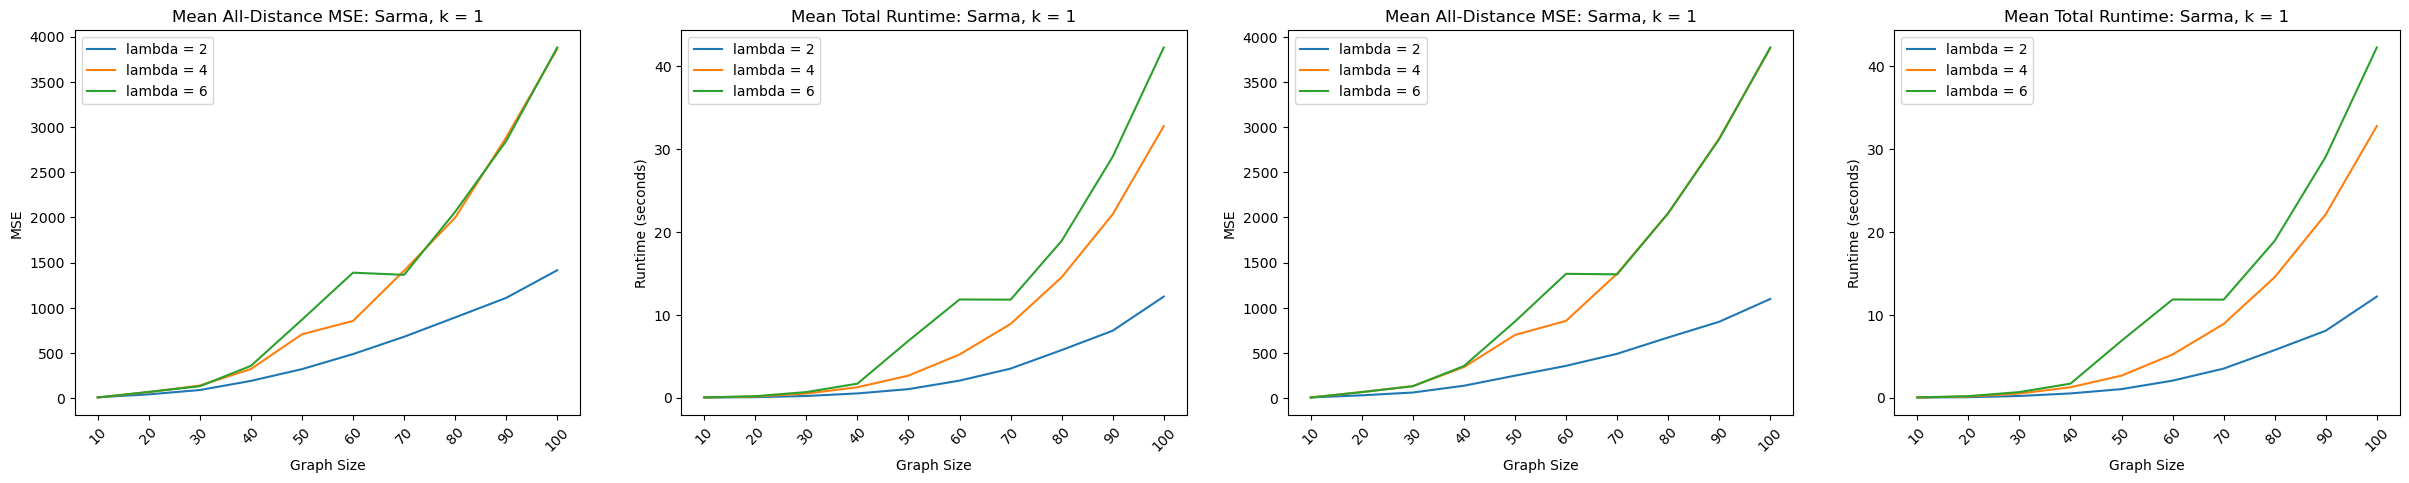

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


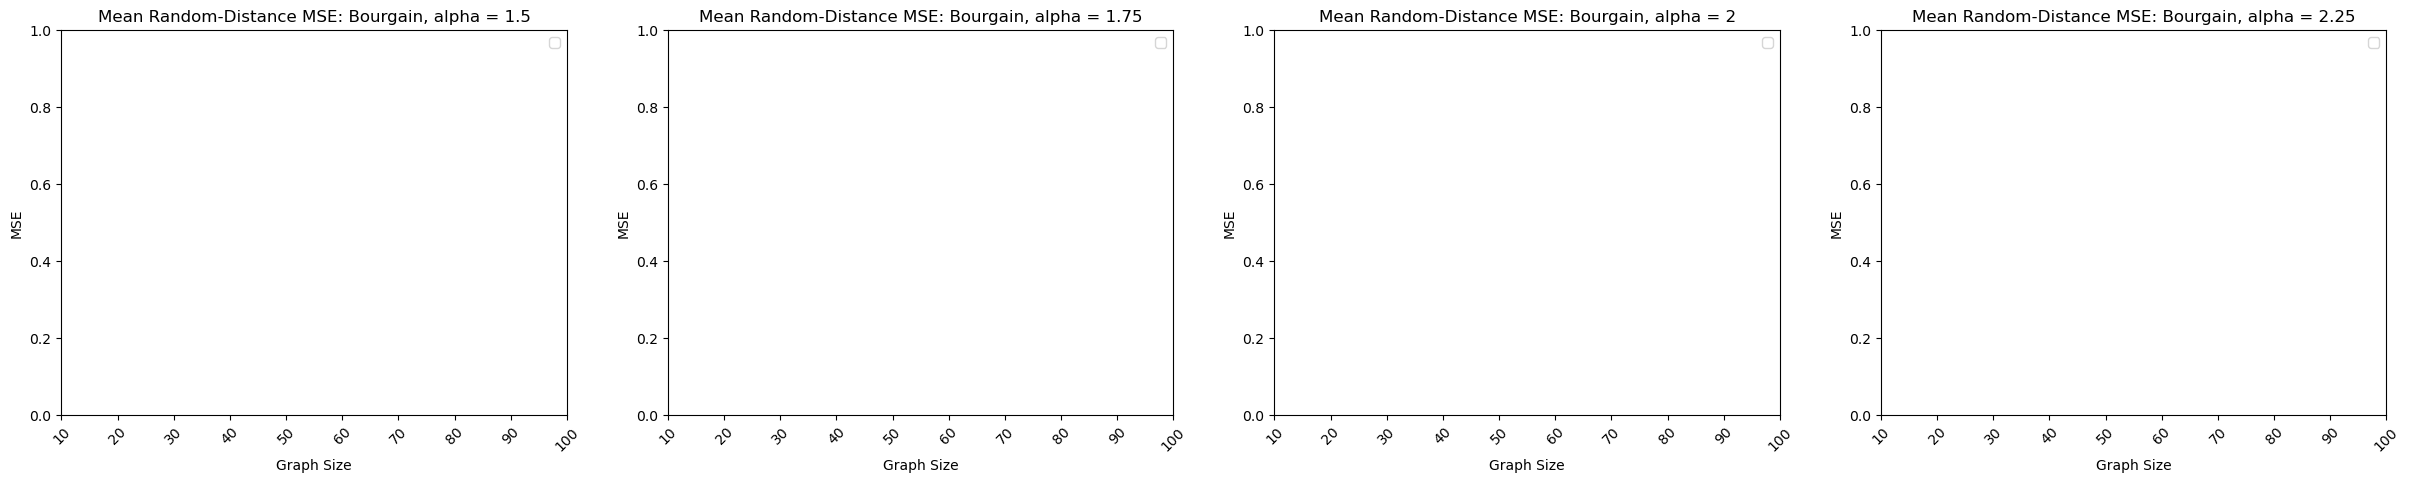

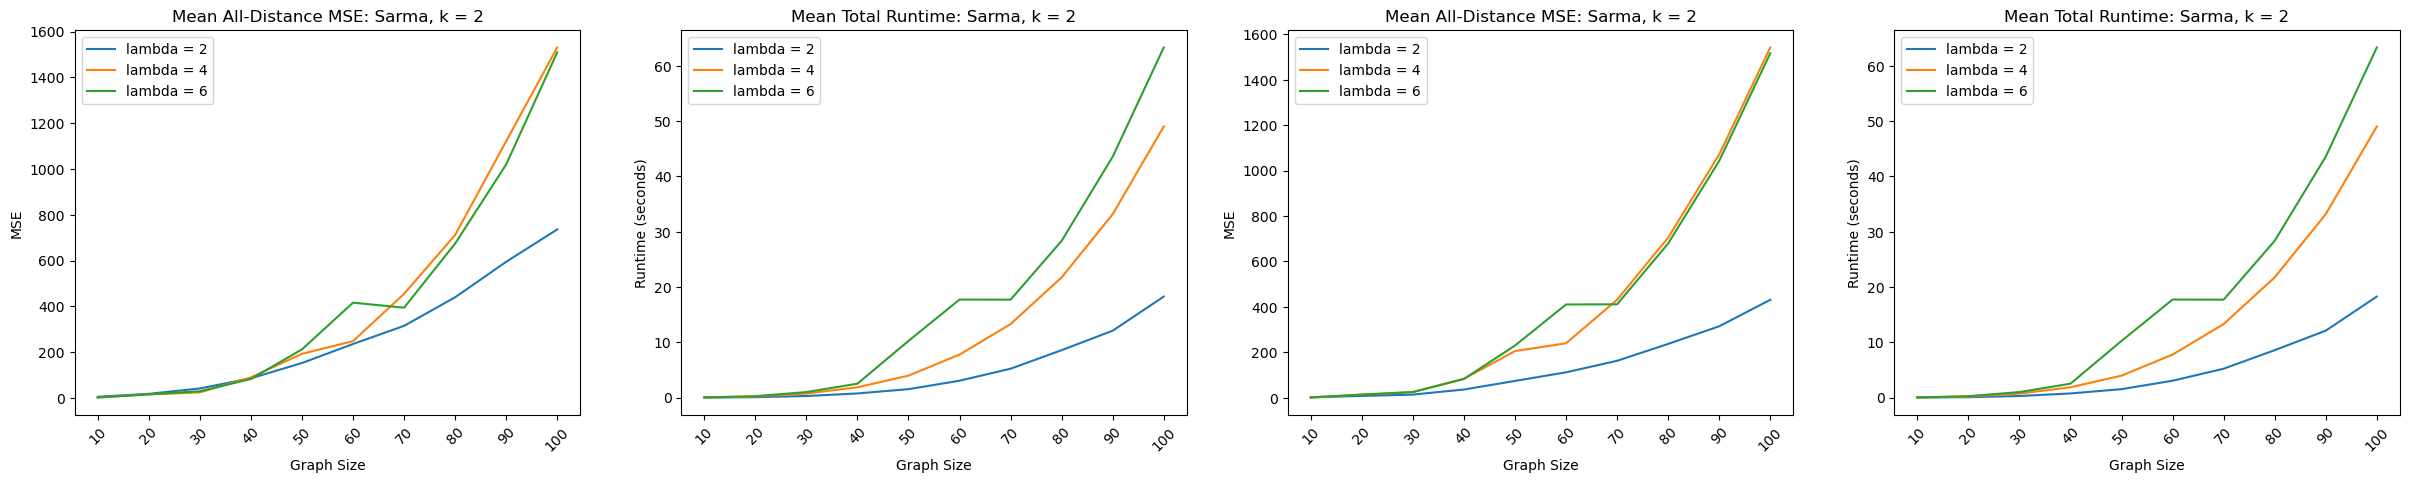

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


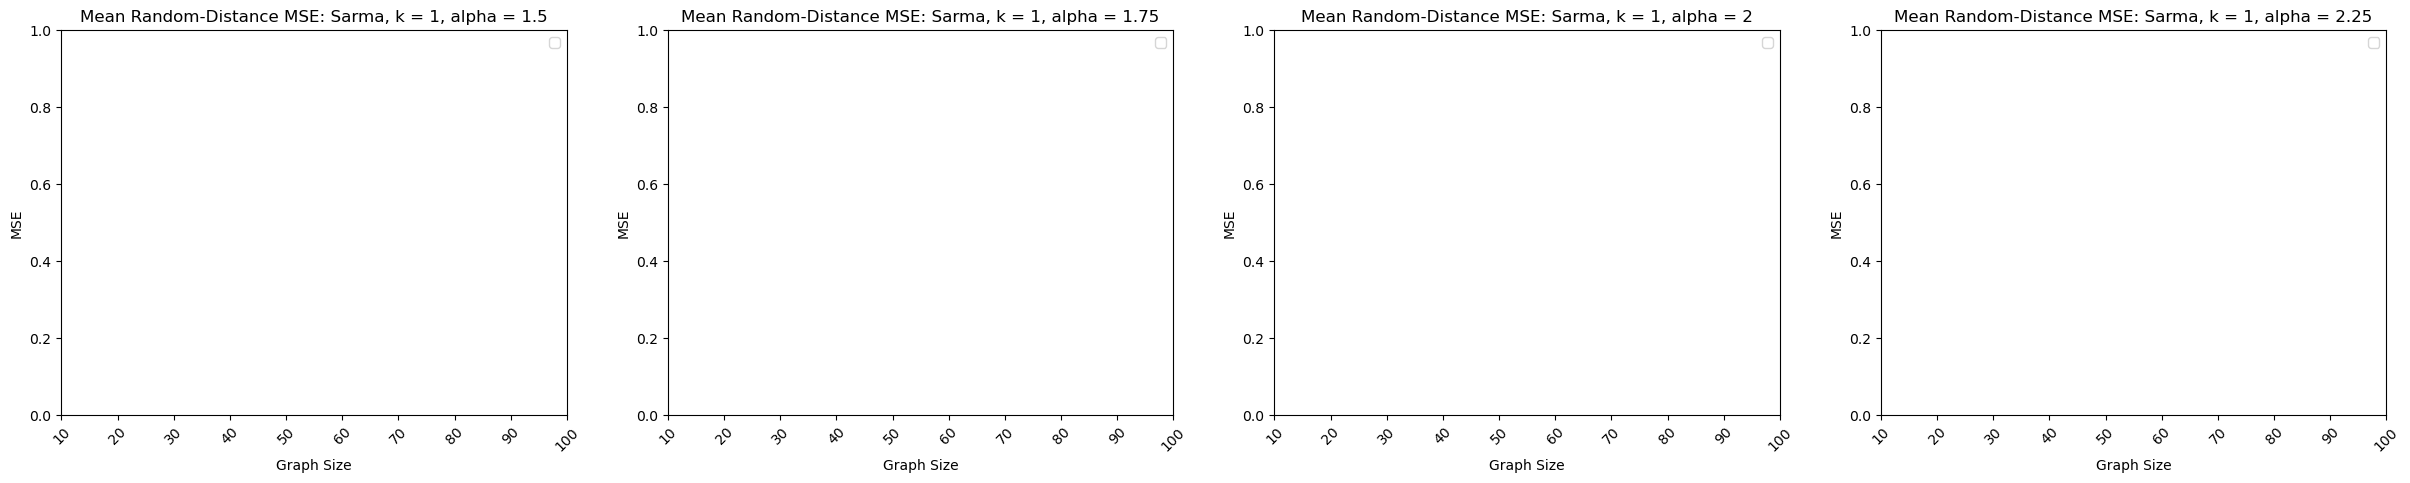

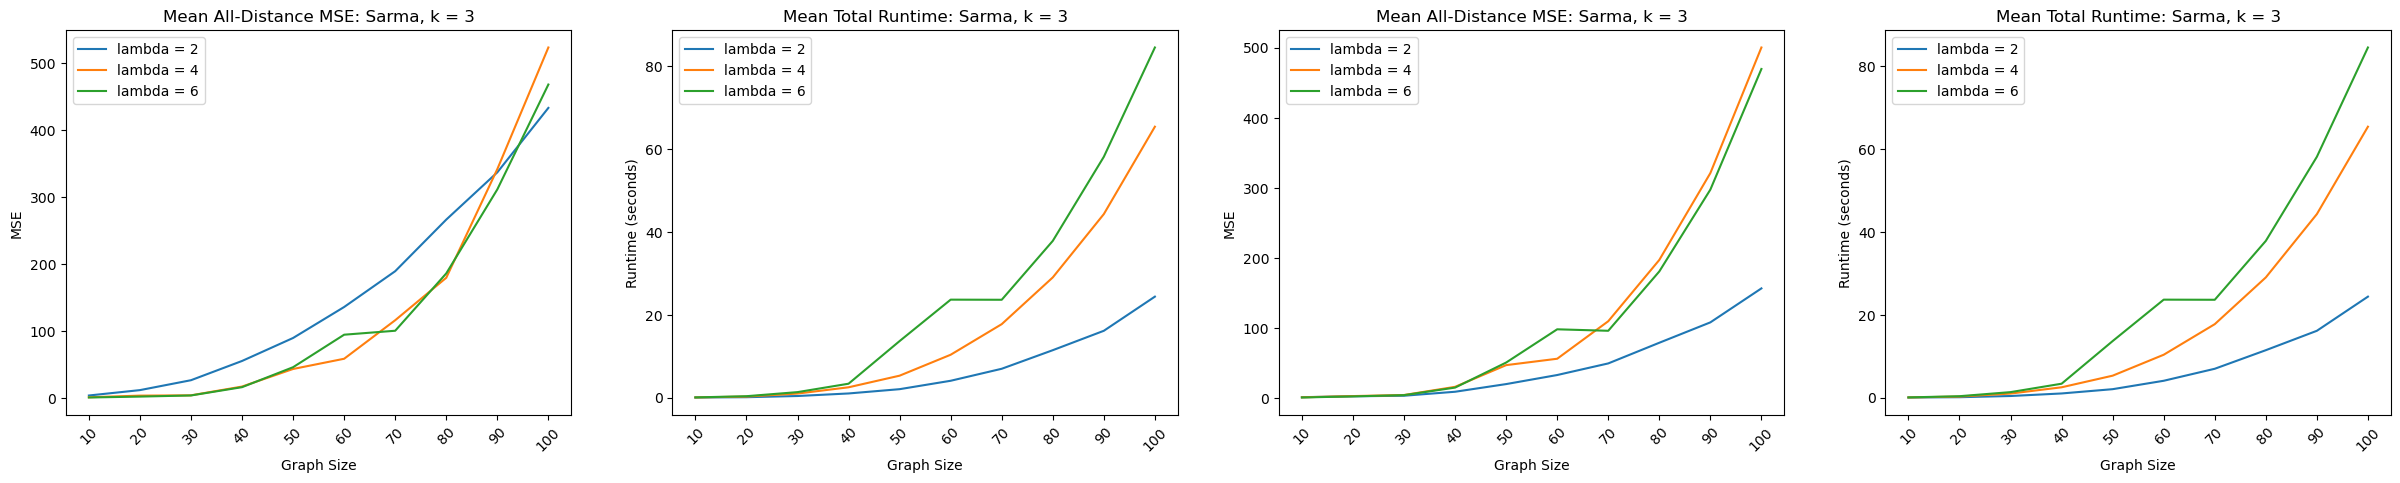

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


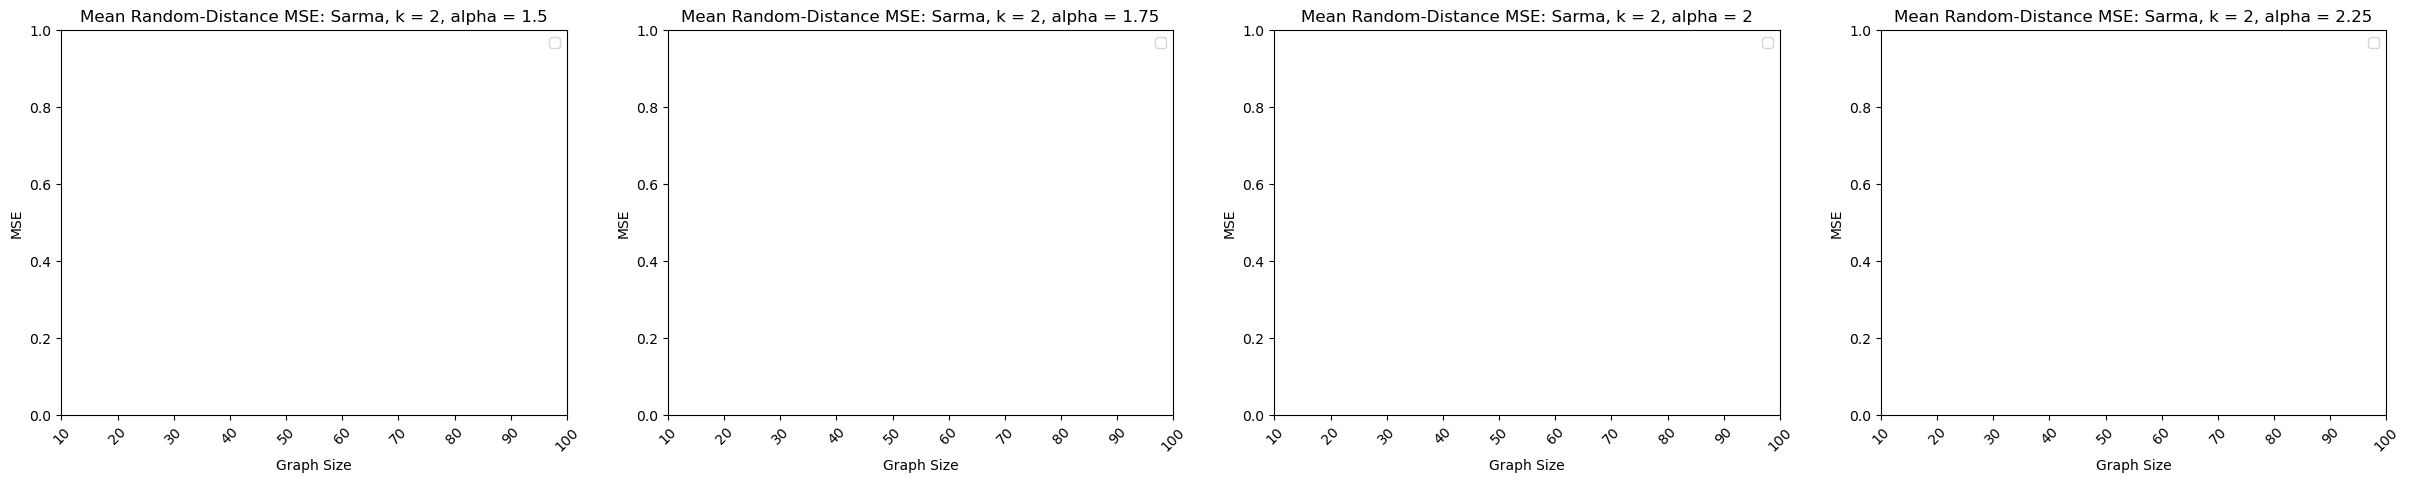

In [8]:
dir = 'outputs2'
graph_sizes = list(np.array(range(1,10))*10)+list(2**np.array(range(9))*100)
lbds = [2,4,6]
summary_by_type(dir,lbds)

In [9]:
idx1 = (range(140)[2::20])
idx2 = (range(140)[3::20])
idx3 = (range(140)[4::20])
idx4 = (range(140)[5::20])
idx5 = (range(140)[6::20])
idx6 = (range(140)[7::20])
idx7 = (range(140)[8::20])
idx8 = (range(140)[9::20])
idx9 = (range(140)[10::20])
idx10 = (range(140)[11::20])
idx11 = (range(140)[12::20])
idx12 = (range(140)[13::20])
idx13 = (range(140)[14::20])
idx14 = (range(140)[15::20])
idx15 = (range(140)[16::20])
idx16 = (range(140)[17::20])
idx17 = (range(140)[18::20])
idx18 = (range(140)[19::20])

def showFig(dir,list):
        graph_sizes = 2**np.array(range(12))*10
        for i in range(1):
            for j in range(len(graph_sizes)):
                pos = i*10+j
                print(scales[i], graph_sizes[j], probabilities[j])
                fig = plt.figure(figsize=(15, 30))
                img = mpimg.imread(dir+'/'+str(train_index[pos])+'.png')
                fig.add_subplot(1, 3, 1)
                plt.imshow(img)
                plt.axis('off')
                img = mpimg.imread(dir+'/'+str(val_index[pos])+'.png')
                fig.add_subplot(1, 3, 2)
                plt.imshow(img)
                plt.axis('off')
                img = mpimg.imread(dir+'/'+str(test_index[pos])+'.png')
                fig.add_subplot(1, 3, 3)
                plt.imshow(img)
                plt.axis('off')
                plt.tight_layout()
                #plt.savefig(string+'original.png')
                plt.show()
